In [1]:
# Pandas library for the pandas dataframes
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import scipy



# Import Scikit-Learn library for decision tree models
import sklearn 

from sklearn import datasets, linear_model, metrics, tree
from sklearn.utils import resample

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

from sklearn.linear_model import ElasticNet, Lasso,  RidgeCV

from sklearn.neighbors import KNeighborsRegressor

        
# Dataset splitting        
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV

# Errors
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

from matplotlib import pyplot as plt

from tqdm import tqdm

import os
import joblib



In [5]:
df_emi = pd.read_csv("hao_all_emi_scaled.csv")
df_emi

,Unnamed: 0,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,...,x8_dioctyl ether,x8_oleic acid,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm,abs_nm,emission_nm
0,0,-0.587378,-0.622362,-0.198864,-0.286002,-0.420577,-0.596494,0.378054,-0.498460,-0.254494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,436,481
1,2,7.946556,7.859769,4.366852,-0.286002,-0.420577,-0.596494,-0.185590,-0.581011,-0.254494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,465,550
2,24,-0.285673,1.180091,-0.644300,-0.286002,-0.420577,0.297175,-0.185590,1.235111,-0.254494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,553,592
3,25,-0.414975,-0.471652,-0.644300,-0.286002,-0.420577,-0.006527,-0.185590,0.632488,-0.254494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,430,482
4,26,-0.414975,-0.357295,-0.644300,-0.286002,-0.420577,-0.006527,-0.185590,0.632488,-0.254494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,492,529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,240,1.334912,1.573904,-0.644300,4.056869,-0.420577,-0.596494,-0.185590,-0.581011,0.653295,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.8,689,765
106,241,1.334912,1.573904,-0.644300,4.056869,-0.420577,-0.596494,-0.185590,-0.581011,0.653295,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,729,775
107,242,2.946878,0.869585,-0.644300,2.093509,-0.420577,-0.596494,-0.185590,-0.581011,9.721213,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None,599,612
108,243,1.274571,0.816571,-0.644300,2.886680,-0.420577,-0.596494,-0.185590,-0.581011,0.490691,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,633,653


In [7]:
# Input for ML models

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_chloroindium oxalate',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium laurate',
             'x0_indium myristate',
             'x0_indium oxalate',
             'x0_indium paltimate',
             'x0_indium stearate',
             'x0_indium trifluoroacetate',
             'x0_indium tris(N,N-diisopropylacetamidinato)',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphine gas',
             'x1_phosphorus trichloride',
             'x1_sodium phosphide',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x1_white phosphorus',
             'x2_4-ethylpyridine',
             'x2_None',
             'x2_dimethylformamide',
             'x2_mesitylene',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x6_dodecanethiol',
             'x7_None',
             'x7_zinc acetate',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc octanoate',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_dioctyl ether',
             'x8_oleic acid',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide'
            ]

output_col = ['emission_nm']

X = df_emi[input_col]

Y = df_emi[output_col]

In [8]:
# Splitting dataset for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

### 1. Bagging

In [9]:
# This is a grid search for three parameters in the Bagging algorithm. 
# Parameters are: max_depth, n_estimators, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)
            
            B_regr.fit(X_train, np.ravel(Y_train))
            
            B_Y_pred = B_regr.predict(X_test)
            
            mae = mean_absolute_error(Y_test, B_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [02:15<00:00,  6.78s/it]

25.41988795518207 5 1 10


### 2. Decision Trees

In [10]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)

            DT_Y_pred = DT_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [00:31<00:00,  1.58s/it]

19.60130718954248 6 7 40


### 3. Random Forrest

In [11]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 50, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45
                                                )
            RF_regr.fit(X_train, np.ravel(Y_train))
            RF_Y_pred = RF_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [02:47<00:00,  8.40s/it]

20.41176470588235 15 1 16


### 4. Extra Trees

In [12]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 50, 2):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k
                                                )
            ET_regr.fit(X_train, np.ravel(Y_train))
            ET_Y_pred = ET_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [02:27<00:00,  7.39s/it]

19.38235294117647 2 6 22


Mean absolute error = 19.382


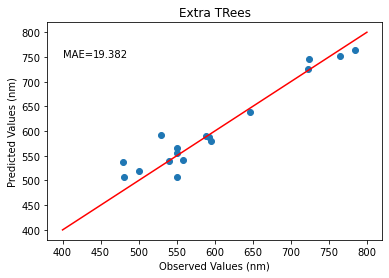

In [16]:
ET_regr = ExtraTreesRegressor(n_estimators=2, max_features=6, random_state=22)
            
ET_regr.fit(X_train, np.ravel(Y_train))
            
ET_Y_pred = ET_regr.predict(X_test)
            
ET_mae = mean_absolute_error(Y_test, ET_Y_pred)
print("Mean absolute error =", round(ET_mae,3))

plt.figure()
plt.title("Extra TRees")
plt.plot(Y_test, ET_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(ET_mae,3) , fontdict=None)
plt.show()

### 5. Gradient Boosting

In [ ]:
min_mae = 999
min_i, min_j, min_k = 0, 0, 0.0
for i in tqdm(range(300, 400, 10)):
    for j in range(2, 40, 2):
        for k in np.arange(0.04, 0.22, 0.02):
            for l in range(2, 10, 2):
            
            GB_regr = GradientBoostingRegressor(n_estimators=i, max_depth=j, learning_rate=k)
            GB_regr.fit(X_train, np.ravel(Y_train))
            GB_Y_pred = GB_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, GB_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k

print(min_mae, min_i, min_j, min_k)

### 6. Others

In [17]:
REGRESSIONS = {
    "K-nn": KNeighborsRegressor(),                          
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
                }
# mean absolute error is used to evaluate the performance of all regressions.


for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    
    print(' MAE for diameter is ', mae, '\n')

K-nn
 MAE for diameter is  38.564705882352946 

Ridge
 MAE for diameter is  57.65949074089814 

Lasso
 MAE for diameter is  57.551639363402266 

ElasticNet
 MAE for diameter is  59.19111805902884 



## Conclusion

Extra Trees gave the best performance.

### Saving model

In [41]:
ET_regr = ExtraTreesRegressor(n_estimators=2, max_features=6, random_state=22)
            

ET_regr.fit(X_train, np.ravel(Y_train))
ET_Y_pred = ET_regr.predict(X_test)

joblib.dump(ET_regr, "./model_extra_tree_emission.joblib")


['./model_extra_tree_emission.joblib']